In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from utility_functions import * 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score



In [6]:
df = pd.read_csv('data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df['Class'] = df['class'].apply( lambda x: {"e": 'Edible','p': 'Poisonous'}[x])

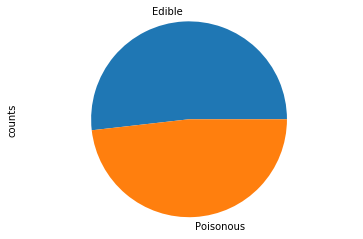

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df['counts'] = 1
df.counts.groupby(df.Class).sum().plot(kind='pie')
plt.axis('equal')
plt.show()

In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'Class',
       'counts'],
      dtype='object')


# Labels 
* classes: edible=e, poisonous=p

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, 

* green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


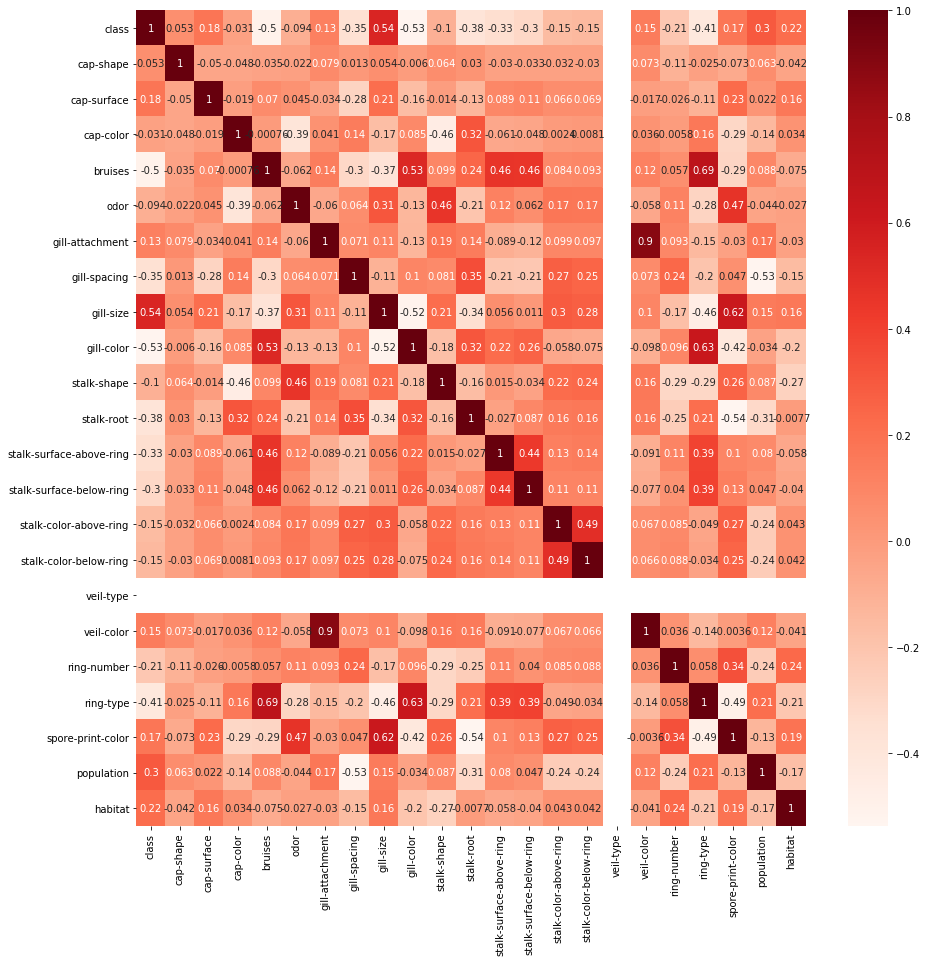

In [10]:
df = pd.read_csv('data/mushrooms.csv')
Encoder = LabelEncoder() 
for col in df.columns:
    df[col] = Encoder.fit_transform(df[col])
    
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [11]:
cor[cor['class'] > .15].T.columns

Index(['class', 'cap-surface', 'gill-size', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [12]:
df = pd.read_csv('data/mushrooms.csv')

habitat_label_dict = {"g": "grasses","l": "leaves",'m': "meadows", 
                      "p": "paths", "u": "urban" ,"w": "waste"  , "d": "woods" }
df['Habitat'] = df['habitat'].apply( lambda x : habitat_label_dict[x])

df['Class'] = df['class'].apply( lambda x: {"e": 'Edible','p': 'Poisonous'}[x])

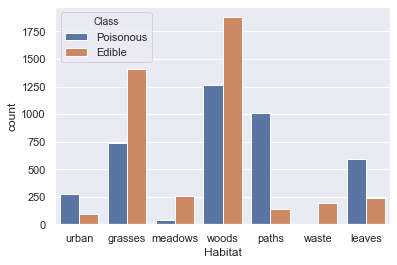

In [13]:

sns.set(style="darkgrid")
ax = sns.countplot(x='Habitat', hue="Class", data=df)
plt.show()

In [14]:
spore_print_color_dict = {'k': 'black',
 'n': 'brown',
 'b': 'buff',
 'h': 'chocolate',
 'r': 'green',
 'o': 'orange',
 'u': 'purple',
 'w': 'white',
 'y': 'yellow'}

df["Spore Print Color"] = df['spore-print-color'].apply( lambda x: spore_print_color_dict[x])

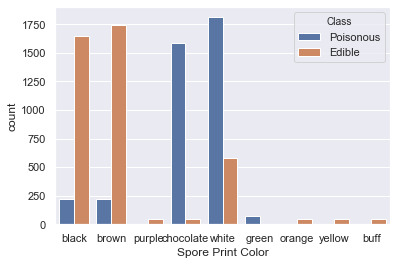

In [15]:
sns.set(style="darkgrid")
ax = sns.countplot(x='Spore Print Color', hue="Class", data=df)
plt.show()

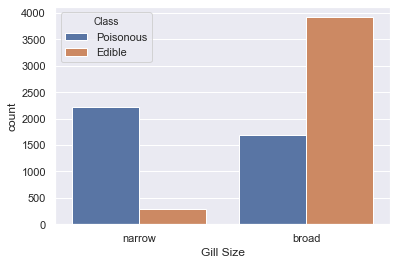

In [16]:
gill_size_dict = {"b": "broad",  "n" : "narrow" }
df["Gill Size"] = df['gill-size'].apply( lambda x: gill_size_dict[x])
sns.set(style="darkgrid")
ax = sns.countplot(x='Gill Size', hue="Class", data=df)
plt.show()

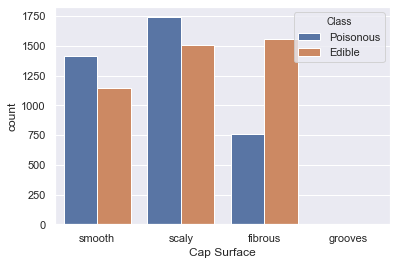

In [17]:
cap_surface_dict = {"f": "fibrous" ,"g": "grooves", "y" : "scaly", "s":  "smooth"}
df["Cap Surface"] = df['cap-surface'].apply( lambda x: cap_surface_dict[x])
sns.set(style="darkgrid")
ax = sns.countplot(x="Cap Surface", hue="Class", data=df)
plt.show()


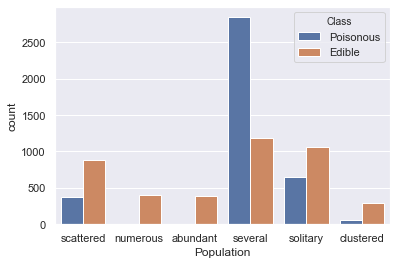

In [19]:
population_dict = {"a": "abundant", "c": "clustered", "n": "numerous" , "s": "scattered", "v": "several", "y": "solitary"} 


df["Population"] = df['population'].apply( lambda x: population_dict[x])
sns.set(style="darkgrid")
ax = sns.countplot(x="Population", hue="Class", data=df)
plt.show()

In [20]:
df = pd.read_csv('data/mushrooms.csv')

x = df[['cap-surface', 'gill-size', 'spore-print-color', 'population', 'habitat']]  

y = df['class']
x.head()

,cap-surface,gill-size,spore-print-color,population,habitat
0,s,n,k,s,u
1,s,b,n,n,g
2,s,b,n,n,m
3,y,n,k,s,u
4,s,b,n,a,g


In [21]:
enc_x = OneHotEncoder(drop='first').fit(x)

y = pd.get_dummies(df['class'], drop_first=True).values

x = enc_x.transform(x).toarray()


In [22]:
import pickle
with open("encoder.pkl", "wb") as f: 
    pickle.dump(enc_x, f)

# Train and Test split

In [23]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3,  random_state=42)

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(x_train, y_train)

C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
y_prob = model_naive.predict_proba(x_test)[:,1]  

(array([ 256.,    5.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2177.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

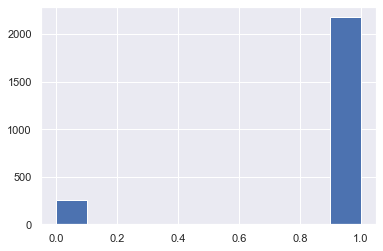

In [26]:
plt.hist(y_prob)

In [27]:
y_pred = np.where(y_prob > 0.5, 1, 0) 


In [28]:
classification_metrics(y_test, y_pred)

Precision score: 0.5424896646761599
Recall score: 1.0
F1 Score: 0.7033948779035141
Confusion Matrix 

[[ 261  996]
 [   0 1181]]


# Logistic Regression

In [29]:
classifier = LogisticRegression()

classifier.fit(x_train,y_train)

C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = classifier.predict(x_test)

In [31]:
classification_metrics(y_test, y_pred)

Precision score: 0.9609438567941416
Recall score: 1.0
F1 Score: 0.9800829875518672
Confusion Matrix 

[[1209   48]
 [   0 1181]]


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test )

C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [33]:
classification_metrics(y_test, y_pred)

Precision score: 0.9808970099667774
Recall score: 1.0
F1 Score: 0.9903563941299791
Confusion Matrix 

[[1234   23]
 [   0 1181]]


# SVM 

In [34]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train,y_train)

C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
y_pred = clf.predict(x_test )

In [64]:
classification_metrics(y_test, y_pred)

Precision score: 0.9808970099667774
Recall score: 1.0
F1 Score: 0.9903563941299791
Confusion Matrix 

[[1234   23]
 [   0 1181]]


In [37]:
with open('model.pkl', 'wb') as fid:
    pickle.dump(clf, fid)    